# ELEC474 Prelab4



In [903]:
import cv2 as cv
import numpy as np
import random
import math
import time
from matplotlib import pyplot as plt

In [904]:
global my_SIFT_instance, my_BF_instance
my_SIFT_instance = cv.SIFT_create()
my_BF_instance = cv.BFMatcher()


img1Name = "lena.png"
img2Name = "backpack_left.png"
img3Name = "backpack_right.png"
img4Name = "selfTest1.jpg"
img5Name = "selfTest2.jpg"

imgDescipt_1 = np.array((
"lena.png keypoint",
"backpack_left.png keypoint",
"backpack_right.png keypoint"
))

imgDescipt_2 = np.array((
    "Lena Match",
    "Backpack Match"
))


## 1.1

In [905]:
def PltImg(img,imgDescipt):
    plt.figure(dpi=300)
    plt.figure(figsize=(15,15))
    idx = len(img)
    for i in range(len(img)):
        plt.subplot(1,idx,i+1)
        plt.imshow(img[i],cmap="gray")
        plt.title(imgDescipt[i])
    plt.tight_layout()

In [906]:

def SIFTOut(imgName):
    img = cv.imread(imgName)
    imgGray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    imgKpOut = np.copy(imgGray)
    kp, des = my_SIFT_instance.detectAndCompute(imgGray,None)
    imgKpOut = cv.drawKeypoints(imgKpOut,kp,0)
    return imgKpOut,kp,des

In [907]:
def BFMatchDescriptor(pram1, pram2, kNum):
    des1 = pram1[2]
    des2 = pram2[2]
    matches = my_BF_instance.knnMatch(des1,des2,k = kNum)
    return cv.drawMatchesKnn(pram1[0],pram1[1],pram2[0],pram2[1],matches,None,flags=2)

<Figure size 1800x1200 with 0 Axes>

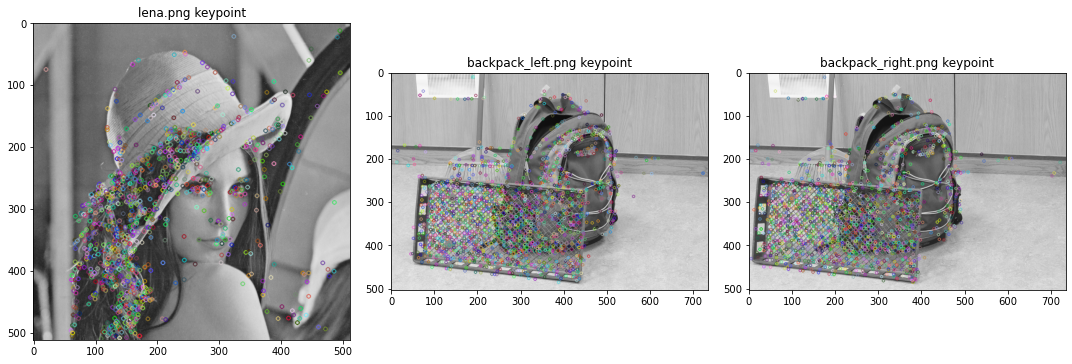

<Figure size 1800x1200 with 0 Axes>

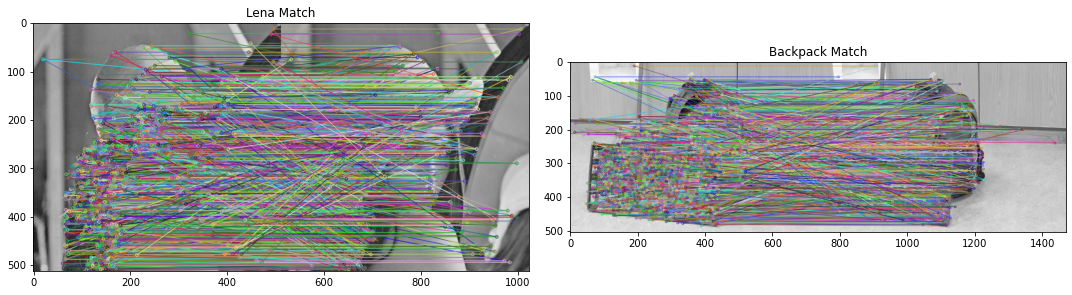

In [908]:
outImages = []
matchImages = []
outImages.append(SIFTOut(img1Name))
outImages.append(SIFTOut(img2Name))
outImages.append(SIFTOut(img3Name))
outImages = np.array(outImages,dtype=object)

matchImages.append(BFMatchDescriptor(outImages[0],outImages[0],2))
matchImages.append(BFMatchDescriptor(outImages[1],outImages[2],2))

PltImg(outImages[:,0],imgDescipt_1)
PltImg(matchImages,imgDescipt_2)

## 1.2

In [909]:
def BFMatchLoweRatio(pram1, pram2, kNum, ratio):
    matches = my_BF_instance.knnMatch(pram1[2],pram2[2],k = kNum)
    good = []
    goodDis = []
    allMatchDis = []
    for m,n in matches:
        diff = abs(m.distance - n.distance)
        if m.distance < ratio * n.distance:
            good.append([m])
            goodDis.append(m.distance)
        allMatchDis.append(m.distance)
    return [cv.drawMatchesKnn(pram1[0],pram1[1],pram2[0],pram2[1],good,None,flags=2),allMatchDis,goodDis]

<Figure size 1800x1200 with 0 Axes>

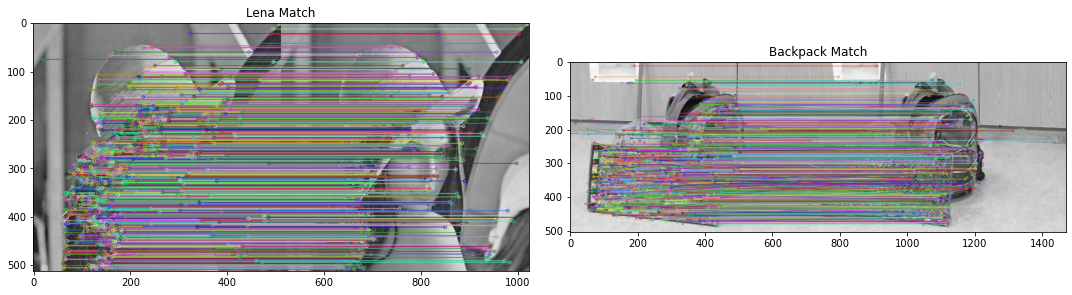

In [910]:
matchRatioImage = []
matchRatioImage.append(BFMatchLoweRatio(outImages[0],outImages[0],2,0.8))
matchRatioImage.append(BFMatchLoweRatio(outImages[1],outImages[2],2,0.8))
matchRatioImage = np.array(matchRatioImage,dtype=object)

PltImg(matchRatioImage[:,0],imgDescipt_2)

## 1.3

In [911]:
def HistogramCompare(allMatch, loweMatch, GroupNum):
    plt.figure(dpi=75)

    plt.hist(allMatch, bins = GroupNum, label="All Matchs")
    plt.hist(loweMatch,bins = GroupNum, label="Lowe's Matches")
    plt.xlabel("Distance between the two descriptors")
    plt.ylabel("Count of the histograms with that distance")
    plt.legend()
    plt.show()
    

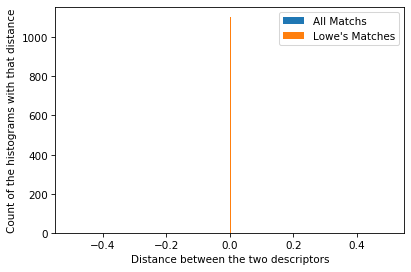

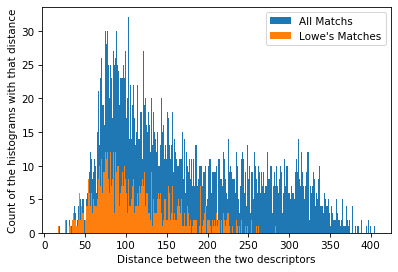

In [912]:
HistogramCompare(matchRatioImage[0,1],matchRatioImage[0,2],300)
HistogramCompare(matchRatioImage[1,1],matchRatioImage[1,2],300)

## Q1 Question: 
### What conclusion can be drawn from this histogram?

## Answer
### The lowe's Matches sucessfuly filter out the points that are "good". Since descriptor is in relatively high dimensional space, the distance will reflect how close those two points are, the smaller the value, the better the result. and since lena has no move at all (which use the same image for compare), the distance are 0
### Furthermore, the image below using more restrict filter to the matches, which result in significant drop on matches number

<Figure size 1800x1200 with 0 Axes>

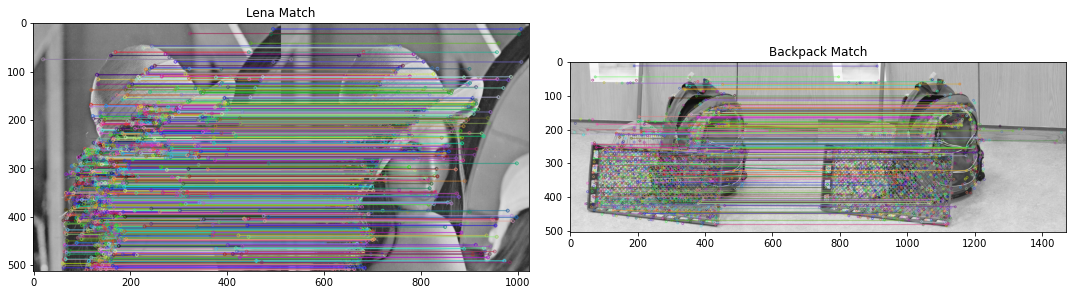

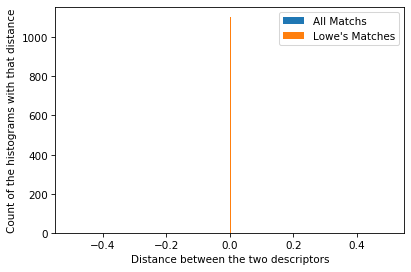

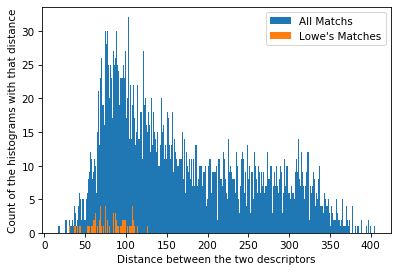

In [913]:
matchRatioImage = []
matchRatioImage.append(BFMatchLoweRatio(outImages[0],outImages[0],2,0.4))
matchRatioImage.append(BFMatchLoweRatio(outImages[1],outImages[2],2,0.4))
matchRatioImage = np.array(matchRatioImage,dtype=object)

PltImg(matchRatioImage[:,0],imgDescipt_2)
HistogramCompare(matchRatioImage[0,1],matchRatioImage[0,2],300)
HistogramCompare(matchRatioImage[1,1],matchRatioImage[1,2],300)